In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer, scale
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pickle

In [90]:
#directory='c:/users/da1933/desktop/cds/ids_project/'
directory='~/desktop/idsproject/'

df1=pd.read_csv(directory+'wine/winemag-data-130k-v2.csv',index_col=0)
#df=pd.read_csv(directory+'wine/winemag-data-130k-v2.csv',index_col=0)
#df=df.drop(['taster_name','taster_twitter_handle','title'],axis=1)
df2=pd.read_csv(directory+'wine/winemag-data_first150k.csv',index_col=0)
df=pd.concat([df1.drop(['taster_name','taster_twitter_handle','title'],axis=1),df2]).reset_index(drop=True)

In [91]:
df['over90']=df['points'].apply(lambda x: 1 if x>=90 else 0)
df['designation']=df['designation'].fillna('missing')
df['textlen']=df['description'].apply(lambda x: len(x))
df['textlen']=scale(df[['textlen']])
df['original_price']=df['price']
df['price']=df['price'].fillna(np.mean(df['price']))
df['price']=scale(df[['price']])

/Users/danielamaranto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [110]:
df[df['points']>=90].shape[0]

97255

In [111]:
df[df['points']<90].shape[0]

183646

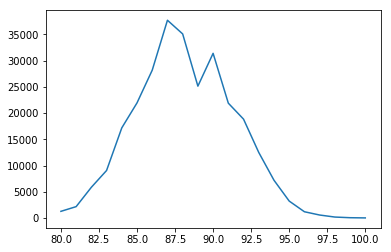

In [109]:
plt.plot(df.groupby(['points']).count()['country'])

In [114]:
df[df['points']<90]['original_price'].describe()

count    170367.000000
mean         24.235503
std          18.665990
min           4.000000
25%          14.000000
50%          20.000000
75%          29.000000
max        3300.000000
Name: original_price, dtype: float64

In [113]:
df[df['points']>=90]['original_price'].describe()

count    87843.000000
mean        53.458500
std         56.063728
min          5.000000
25%         28.000000
50%         42.000000
75%         60.000000
max       2500.000000
Name: original_price, dtype: float64

In [106]:
for i in range(80,101):
    print(i,df[df['points']==i]['original_price'].describe(),'\n')

80 count    1278.000000
mean       16.960876
std         9.724959
min         5.000000
25%        10.000000
50%        14.000000
75%        20.000000
max        80.000000
Name: original_price, dtype: float64 

81 count    2149.000000
mean       17.512331
std        14.844836
min         5.000000
25%        10.000000
50%        14.000000
75%        20.000000
max       354.000000
Name: original_price, dtype: float64 

82 count    5705.000000
mean       19.078352
std        11.321175
min         4.000000
25%        11.000000
50%        16.000000
75%        24.000000
max       150.000000
Name: original_price, dtype: float64 

83 count    8693.000000
mean       18.087887
std        11.667382
min         4.000000
25%        11.000000
50%        15.000000
75%        22.000000
max       225.000000
Name: original_price, dtype: float64 

84 count    16219.000000
mean        19.346199
std         13.007238
min          4.000000
25%         12.000000
50%         15.000000
75%         23.000000
max

In [100]:
df[pd.notnull(df['original_price'])].groupby(['over90','points']).max().drop(['price','textlen'],axis=1)

description  \
over90 points                                                      
0      80      “Wine for Seafood” is a Trebbiano-based wine f...   
       81      “Wine for a new world” says the wine's tagline...   
       82      “Fronty” is an old Australian term for Muscat ...   
       83      “Pannobile” is a designation being used by Bur...   
       84      “The Three Young Ladies”––Viognier, Roussanne ...   
       85      “Pear” sums up the most obvious component of t...   
       86      “T” is a no-fuss Friulano (a native grape of n...   
       87      “Vecio Belo,” which is Venetian for “old” and ...   
       88      “Won't cost you an arm and a leg” is Fat Croc'...   
       89      “Vif” is a French word that loosely translates...   
1      90      “Swan Song” indicates that this is the last vi...   
       91      “L'Homme Mort,” which is French for “the dead ...   
       92      “Wow” is the first word that comes to mind whe...   
       93      “Old vines” here means more than 20 years. But...   
       94      Zinfandel isn't ordinarily a wine you want to ...   
       95      ‘The Beautiful' lives up to its name and reput...   
       96      Youthfully flippant, this block of the Wayfare...   
       97      “For me, this vintage is what makes Margaux sp...   
       98      With this wine, Dolce cements its status as Ca...   
       99      This wine is dark brown in hue with a greenish...   
       100     This wine dazzles with perfection. Sourced fro...   

                                            designation  original_price  \
over90 points                                                             
0      80                          “Champ” Jim the Gent            80.0   
       81                        “Champ” Lightnin' Lane           354.0   
       82       À Côté Santa Barbara Highlands Vineyard           150.0   
       83                                        À Côté           225.0   
       84                    Ürziger Würzgarten Auslese           225.0   
       85                                    ía Crianza           320.0   
       86                                    Über Cuvée           495.0   
       87                   Ürziger Würzgarten Kabinett           800.0   
       88                                        Župska          3300.0   
       89                           ‘Rough Justice' Red           500.0   
1      90                                   étoile Brut           535.0   
       91                   Ürziger Würzgarten Spätlese          2013.0   
       92                                           ‘S'           750.0   
       93                   Ürziger Würzgarten Spätlese           770.0   
       94              Ürziger Würzgarten Beerenauslese          1125.0   
       95                   Ürziger Würzgarten Spätlese           973.0   
       96      Ürziger Würzgarten Auslese * * * Goldkap          2500.0   
       97                                       missing          2000.0   
       98                                       missing          1900.0   
       99                                       missing          2300.0   
       100                                      missing          1500.0   

                            winery  
over90 points                       
0      80                     oops  
       81                 flipflop  
       82                    Ñandú  
       83                    Ébano  
       84                    Ébano  
       85        Único Luis Miguel  
       86                    Ñandú  
       87                    áster  
       88                    Štoka  
       89                 àMaurice  
1      90                    Štoka  
       91                 àMaurice  
       92                 àMaurice  
       93                 àMaurice  
       94                 àMaurice  
       95      Ökonomierat Rebholz  
       96                Zaca Mesa  
       97                 Yao Ming  
       98             

### Selective Categorical Feature Encoding

In [60]:
varietals=df['variety'].value_counts().reset_index().rename(columns={'index':'Grape','variety':'Count'})
varieties=set(varietals[varietals['Count']>2500]['Grape'])
df['variety']=df['variety'].apply(lambda x: x if x in varieties else 'Other')
df['country']=df['country'].fillna('Other')
df['country']=df['country'].replace('US-France','Other')

continents=pickle.load(open('continents.sav','rb'))

df['continent']=df['country'].map(continents)

In [61]:
# Choose among sets to encode here:

enc = OneHotEncoder(handle_unknown='ignore',categories=[list(set(df['country'])),list(set(df['variety']))])
enc.fit(df[['country','variety']])
newdf=pd.DataFrame(enc.transform(df[['country','variety']]).toarray(),columns=enc.get_feature_names().tolist())

#enc = OneHotEncoder(handle_unknown='ignore',categories=[list(set(df['continent'])),list(set(df['variety']))])
#enc.fit(df[['continent','variety']])
#newdf=pd.DataFrame(enc.transform(df[['continent','variety']]).toarray(),columns=enc.get_feature_names().tolist())

#enc = OneHotEncoder(handle_unknown='ignore',categories=[list(set(df['continent']))])
#enc.fit(df[['continent']])
#newdf=pd.DataFrame(enc.transform(df[['continent']]).toarray(),columns=enc.get_feature_names().tolist())

#enc = OneHotEncoder(handle_unknown='ignore',categories=[list(set(df['country']))])
#enc.fit(df[['country']])
#newdf=pd.DataFrame(enc.transform(df[['country']]).toarray(),columns=enc.get_feature_names().tolist())

#enc = OneHotEncoder(handle_unknown='ignore',categories=[list(set(df['variety']))])
#enc.fit(df[['variety']])
#newdf=pd.DataFrame(enc.transform(df[['variety']]).toarray(),columns=enc.get_feature_names().tolist())

for i in ['textlen','over90','points','price','original_price']:
    newdf[i]=df[i]

### Train-Test-Split

In [62]:
newdf=newdf.set_index(np.random.permutation(newdf.index.values)).sort_index()

# Determine split index:
split_index=int(np.round(newdf.shape[0]*.8))

# Assign training and testing datasets based on split index
train_df=newdf.iloc[:split_index,:]
test_df=newdf.iloc[split_index:,:]

trainX=train_df.drop(['over90','points','original_price'],axis=1)
trainY=train_df[['over90','points','original_price']]
testX=test_df.drop(['over90','points','original_price'],axis=1)
testY=test_df[['over90','points','original_price']]

### Cross Validation

In [63]:
def xVal(dataset, label_name, k,model):
    kf = KFold(n_splits=k)
    results=[]
    highest=0
    for train_idxs, test_idxs in kf.split(dataset.drop(label_name,1)):
        train=dataset.iloc[train_idxs]
        test=dataset.iloc[test_idxs]

        clf=model().fit(train.drop(label_name,1),train[label_name])
        auc=roc_auc_score(test[label_name], clf.predict_proba(test.drop(label_name,1))[:,1])
        score=clf.score(test.drop(label_name,axis=1),test[label_name])
        if score > highest:
            highest=score
            best_model=clf
        results.append((auc,score))
            
    return results,best_model

In [64]:
def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

## Minimizing expenditures

In [65]:
rfc=pickle.load(open('rfc_model.sav','rb'))

In [66]:
sum(rfc.predict(testX)==testY['over90'])/testX.shape[0]

0.735439658241367

In [67]:
outcomes=testY.copy()

In [68]:
outcomes['prediction']=rfc.predict(testX)

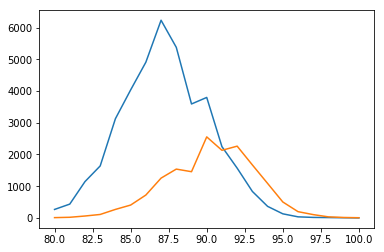

In [127]:
plt.plot(range(80,101),outcomes.groupby(['prediction','points']).count()['over90'][:21].values)

plt.plot(range(80,101),outcomes.groupby(['prediction','points']).count()['over90'][21:].values)

In [172]:
np.cumsum(outcomes[pd.notnull(outcomes['original_price'])].sort_values(by='original_price')['original_price'])

0              4.0
1              8.0
21            13.0
22            18.0
23            23.0
24            28.0
25            33.0
26            38.0
27            43.0
28            48.0
30            53.0
31            58.0
32            63.0
33            68.0
34            73.0
35            78.0
36            83.0
20            88.0
19            93.0
29            98.0
17           103.0
18           108.0
2            113.0
3            118.0
4            123.0
6            128.0
7            133.0
8            138.0
5            143.0
10           148.0
           ...    
51624    1741392.0
51625    1741942.0
51626    1742522.0
51627    1743110.0
51629    1743705.0
51628    1744300.0
51630    1744899.0
51631    1745499.0
51632    1746124.0
51633    1746749.0
51634    1747374.0
51635    1748034.0
51636    1748704.0
51637    1749389.0
51638    1750099.0
51639    1750856.0
51641    1751631.0
51640    1752406.0
51642    1753254.0
51643    1754104.0
51644    1755104.0
51645    175

In [173]:
sum(np.cumsum(outcomes[pd.notnull(outcomes['original_price'])].sort_values(by='original_price',ascending=False)['original_price'])<=1000000)

42461

In [174]:
sum(np.cumsum(outcomes['original_price'])<=500000)

28810

In [175]:
outcomes.iloc[:28811]['over90'].value_counts()

0    24520
1     4291
Name: over90, dtype: int64

In [168]:
sum(np.cumsum(outcomes[outcomes['prediction']==1]['original_price'])<=500000)

12406

In [ ]:
np.cumsum(outcomes[outcomes['prediction']==1].reset_index(drop=True)['original_price'])

In [171]:
outcomes[outcomes['prediction']==1].reset_index(drop=True).iloc[:12407]['over90'].value_counts()

1    7402
0    5005
Name: over90, dtype: int64